In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ma
import numpy.linalg as npl
import os
from scipy.misc import imresize
from sklearn.neighbors import KNeighborsClassifier as Knc
#from sklearn.cross_validation import train_test_split
from keras import models
from keras import layers
#from keras.utils import to_categorical
import skimage.transform as skt
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def contenu_dossier(path_dossier):
    
    path = path_dossier

    liste_noms = os.listdir(path_dossier)
    liste_chemins = []
    for name in liste_noms:
        if name[-4] != '.':
            liste_chemins2 = contenu_dossier(path_dossier+'/'+name)
            liste_chemins += liste_chemins2
        if name[-4:] == '.jpg':
            liste_chemins += [path_dossier+"/"+name]
        else:
            pass
        
    return liste_chemins
    

In [3]:
model = VGG16(include_top=False, weights='imagenet')

In [4]:
def compute_features(chemins):
    n = len(chemins)
    features = np.zeros((n,25088))
    
    for i in range(n):
        image = np.expand_dims(preprocess_input(skt.resize(plt.imread(chemins[i]),(224,224,3), mode = 'reflect', preserve_range = True)),axis=0)
        features[i,:] = model.predict(image).ravel()
    return features

In [24]:
def trouve_voisins(data, k, distance = "euclidean"):
    n = len(data)
    cible = np.zeros(n)
    data_knn = Knc(k, metric=distance)
    data_knn.fit(data, cible)
    return data_knn.kneighbors(data[-1].reshape(1, -1))

In [53]:
#fonction utile si on utilise la fonction knn
def affichage_voisins(data, k, voisins):
   # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(data[-1]))
    plt.title("distance : " + str(voisins[0][0][0]))
    plt.show()
    
    # Affichage des autres au-dessous
    lines = k//4
    
    
    fig = plt.figure(figsize = (15,15))
    
    for i in range (1, k):
        fig.add_subplot(lines+1, 4, i)
        plt.imshow(plt.imread(data[voisins[1][0][i]]))
        plt.title("distance : " + str(voisins[0][0][i]))
    

    plt.tight_layout()
    plt.show() 
    

In [7]:
def cosine_voisins(data, k):
    distance_totale = cosine_similarity(data, data)
    voisins = np.argsort(-distance_totale[-1])[:k+1]
    distance = distance_totale[-1, voisins]
    return distance, voisins

In [39]:
def affichage_cosine(k, distance, voisins, chemins):
   # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(chemins[-1]))
    plt.title("similarité : " + str(distance[0]))
    plt.show()
    
    # Affichage des autres au-dessous
    lines = k//4
    
    
    fig = plt.figure(figsize = (15,15))
    
    for i in range (1, k):
        fig.add_subplot(lines+1, 4, i)
        print(i)
        plt.imshow(plt.imread(chemins[voisins[i]]))
        plt.title("similarité : " + str(distance[i]))
    

    plt.tight_layout()
    plt.show() 
    

In [9]:
#GENERATION DE TOUS LES CHEMINS
l_ring = contenu_dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring")
l_bracelet = contenu_dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/bracelet")
l_necklace = contenu_dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/necklace")
l_earring = contenu_dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/earring")

In [10]:
features_ring = compute_features(l_ring)
features_bracelet = compute_features(l_bracelet)
features_necklace = compute_features(l_necklace)
features_earring = compute_features(l_earring)

In [11]:
#l_ring = contenu_dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring")
data = list.copy(l_ring)
print(len(data))
data += [l_ring[5]]
print(len(data))
print(data[5])
print(data[-1])
del data[5]
print(len(data))
print(data[5])





188
189
/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_147.jpg
/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_147.jpg
188
/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_052.jpg


In [12]:
def recuperation_features(indice, autre, nom=""):
    
    #concatenation des listes 
    if autre == False :       
        if nom == 'ring' :
            data = list.copy(l_ring)
            data += [l_ring[indice]]
            del data[indice]
            features = np.concatenate((features_ring, features_ring[indice,:].reshape(1,-1)), axis = 0)
            np.delete(features, (indice), axis = 0)
            
        elif nom == 'bracelet' :
            data = list.copy(l_bracelet)
            data += [l_bracelet[indice]]
            del data[indice]
            features = np.concatenate((features_bracelet, features_bracelet[indice,:].reshape(1,-1)), axis = 0)
            np.delete(features, (indice), axis = 0)
            
        elif nom == 'necklace' : 
            data = list.copy(l_necklace)
            data += [l_necklace[indice]]
            del data[indice]
            features = np.concatenate((features_necklace, features_necklace[indice,:].reshape(1,-1)), axis = 0)
            np.delete(features, (indice), axis = 0)
            
        elif nom == 'earring' :
            data = list.copy(l_earring)
            data += [l_earring[indice]]
            del data[indice]
            features = np.concatenate((features_earring, features_earring[indice,:].reshape(1,-1)), axis = 0)
            np.delete(features, (indice), axis = 0)
            
        else :
            data = l_ring + l_bracelet + l_necklace + l_earring
            data += [data[indice]]
            del data[indice]
            features = np.concatenate((features_ring, features_bracelet, features_necklace, features_earring), axis = 0)
            features = np.concatenate((features, features[indice,:].reshape(1,-1)), axis = 0)
            np.delete(features, (indice), axis = 0)
    
        
    else :
        if nom == 'ring' :
            data = l_bracelet + l_necklace + l_earring
            data += [l_ring[indice]]
            features = np.concatenate((features_bracelet, features_necklace, features_earring), axis = 0)
            features = np.concatenate((features, features_ring[indice,:].reshape(1,-1)), axis = 0)
        elif nom == 'bracelet' :
            data = l_ring + l_necklace + l_earring
            data += [l_bracelet[indice]]
            features = np.concatenate((features_ring, features_necklace, features_earring), axis = 0)
            features = np.concatenate((features, features_bracelet[indice,:].reshape(1,-1)), axis = 0)
        elif nom == 'necklace' : 
            data = l_ring + l_bracelet + l_earring
            data += [l_necklace[indice]]
            features = np.concatenate((features_ring, features_bracelet, features_earring), axis = 0)
            features = np.concatenate((features, features_necklace[indice,:].reshape(1,-1)), axis = 0)
        elif nom == 'earring' :
            data = l_ring + l_bracelet + l_necklace
            data += [l_earring[indice]]
            features = np.concatenate((features_ring, features_bracelet, features_necklace), axis = 0)
            features = np.concatenate((features, features_earring[indice,:].reshape(1,-1)), axis = 0)
        else :
            data = l_ring + l_bracelet + l_necklace + l_earring
            data += [data[indice]]
            del data[indice]
            features = np.concatenate((features_ring, features_bracelet, features_necklace, features_earring), axis = 0)
            features = np.concatenate((features, features[indice,:].reshape(1,-1)), axis = 0)
            np.delete(features, (indice), axis = 0)
    
    return data, features

In [27]:
indice = 15
k = 11
autre = True

In [42]:
l_chemins, features = recuperation_features(indice, autre, nom="ring")

In [43]:
distance, voisins = cosine_voisins(features, k)

In [30]:
print(distance[0])
print(distance[1])
print(distance[2])

1.0000000000000004
0.3919180413720488
0.3734884625631377


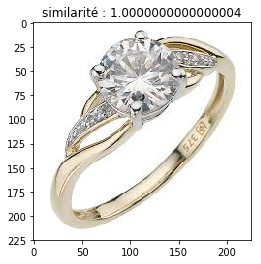

1
2
3
4
5
6
7
8
9
10


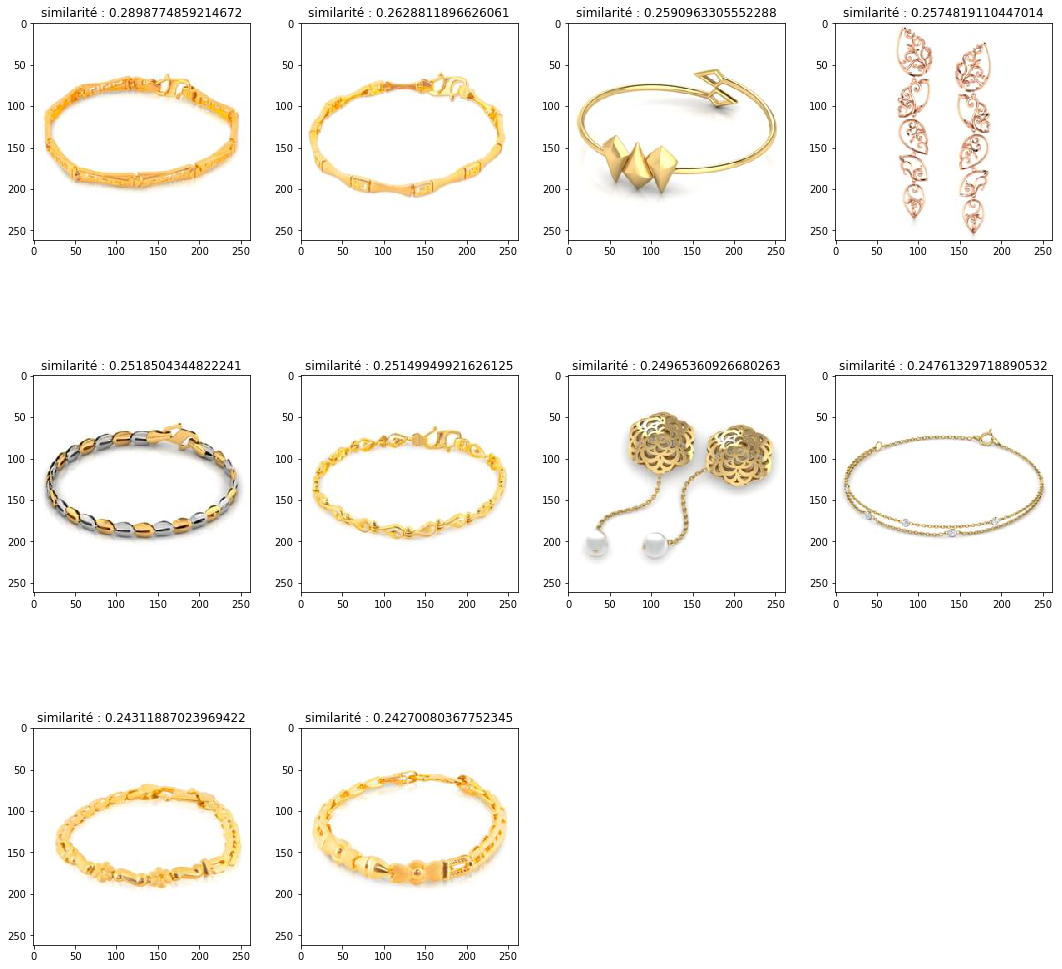

In [44]:
affichage_cosine(k, distance, voisins, l_chemins)

In [51]:
voisins = trouve_voisins(features, k)
print(voisins)

(array([[   0.        , 1303.54748807, 1310.05082994, 1311.97741544,
        1319.32910075, 1326.034982  , 1326.06218838, 1326.80748263,
        1328.05390317, 1329.41236243, 1335.58117982]]), array([[1082, 1062,  329, 1049,  437,  793,  609,  424,  330,  337,  354]]))


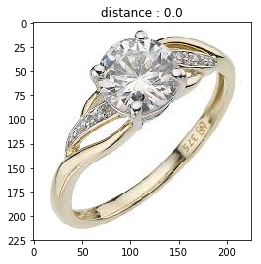

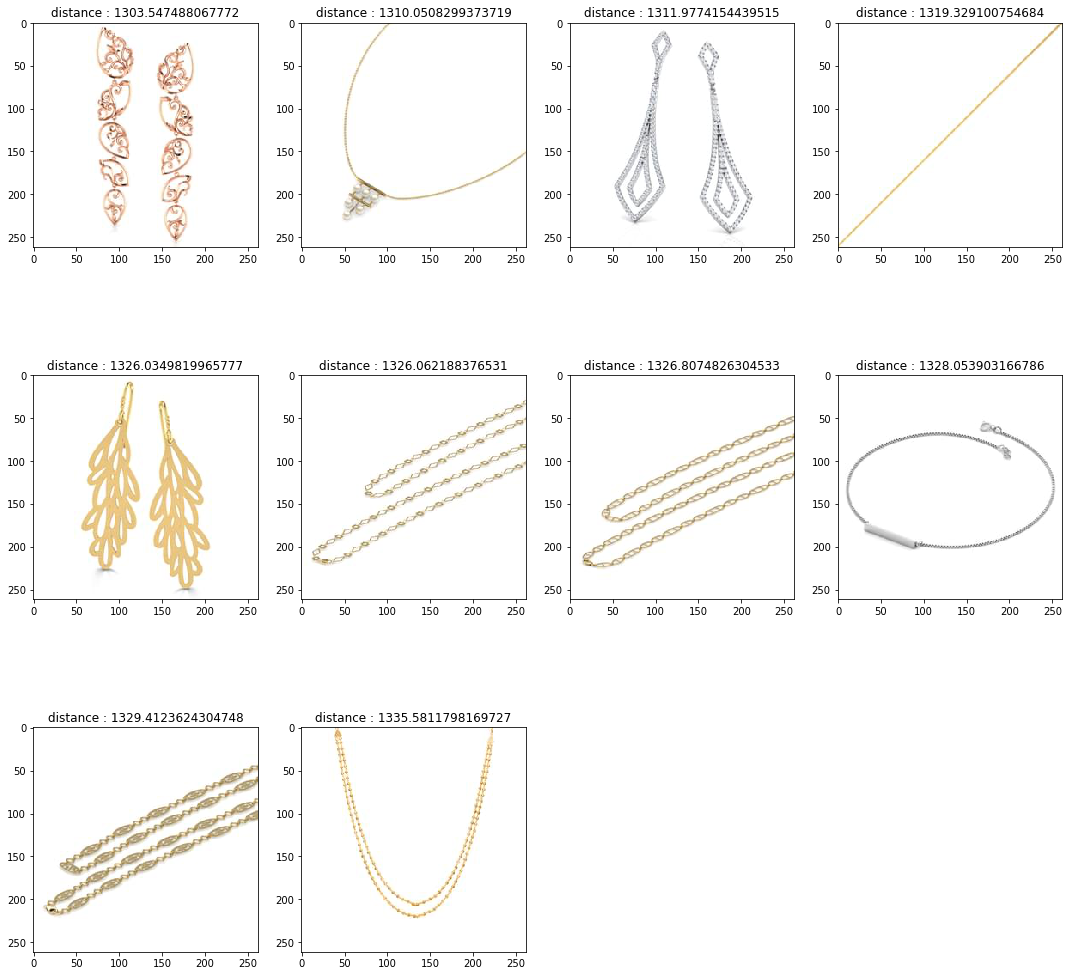

In [54]:
affichage_voisins(l_chemins, k, voisins)

In [45]:
tsne = TSNE(n_components=2, perplexity=10)
pca = PCA(50)

In [46]:
pca_features = pca.fit_transform(features)
tsne_points = tsne.fit_transform(pca_features)

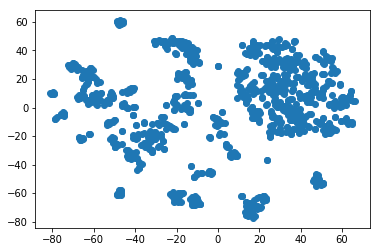

In [47]:
plt.scatter(tsne_points[:,0],tsne_points[:,1])

In [48]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.misc import imread, imresize

def imscatter(x, y, paths, ax=None, zoom=1, linewidth=0):
    if ax is None:
        plt.figure(figsize=(40,40))
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, p in zip(x, y, paths):
        try:
            im = imread(p)
        except:
            print(p)
            continue
        im = imresize(im,(80,80))
        im = OffsetImage(im, zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data',
                            frameon=True, pad=0.1, 
                            bboxprops=dict(edgecolor='red',
                                           linewidth=linewidth));
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


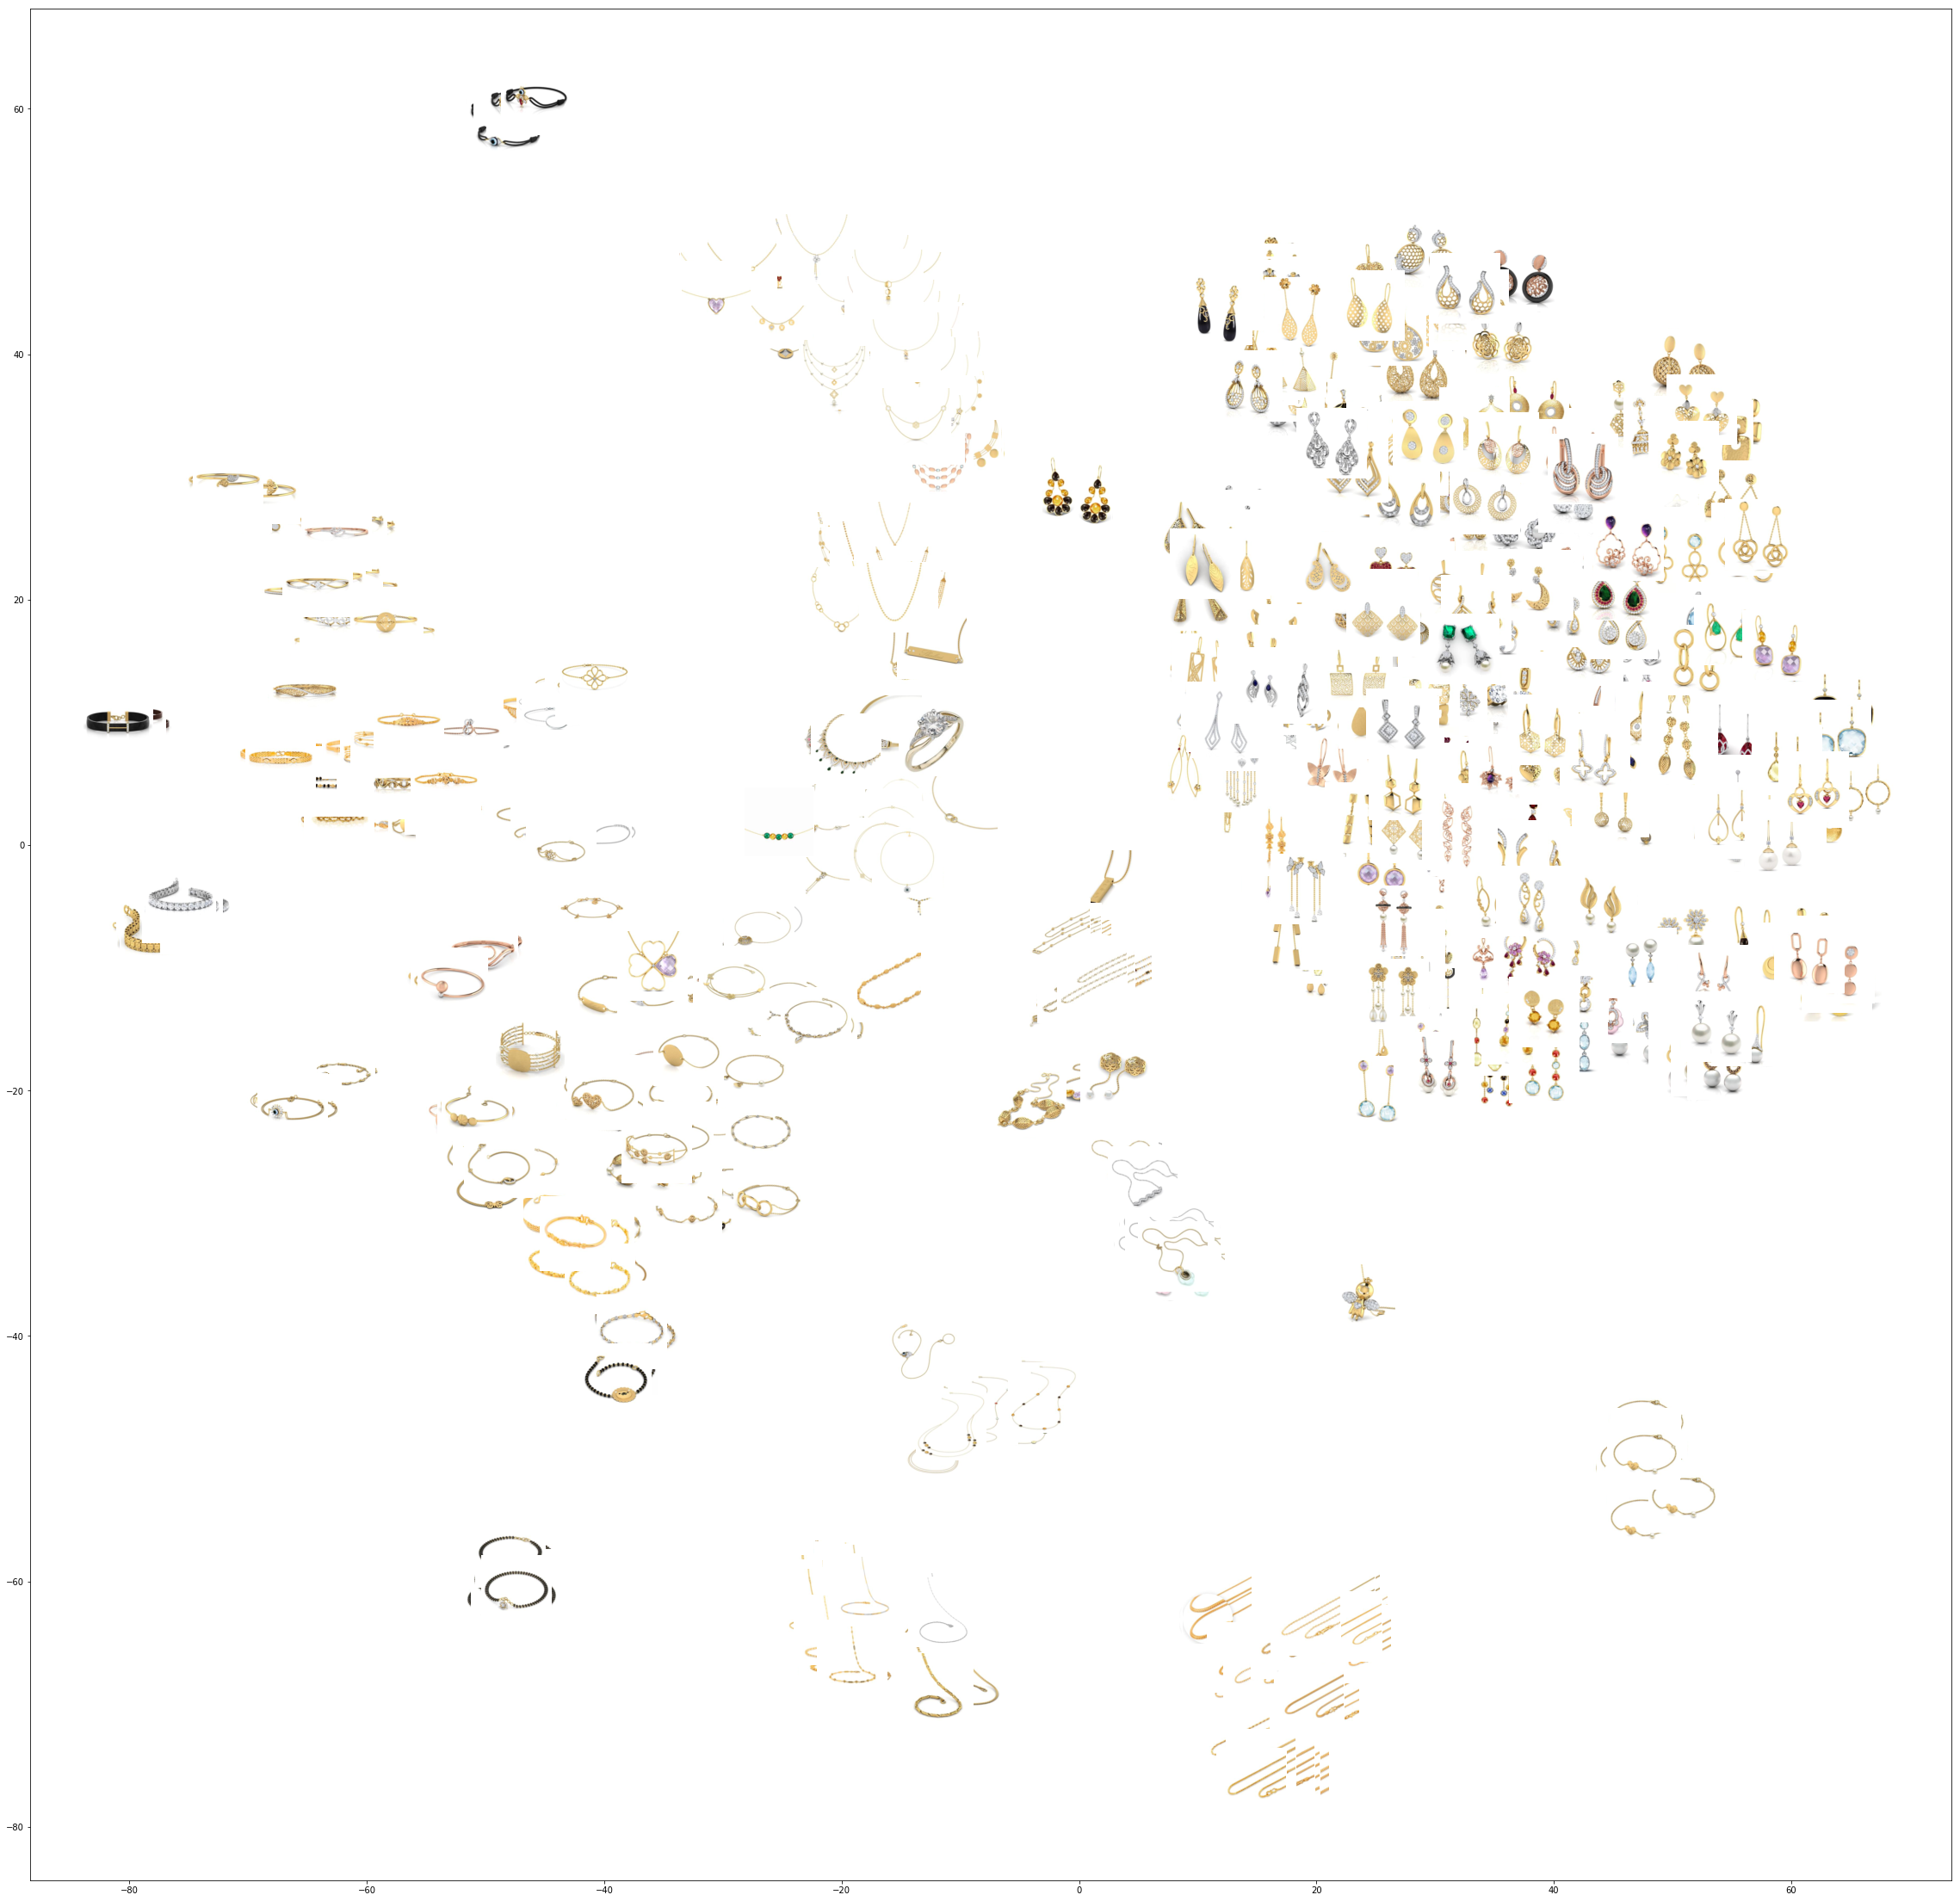

In [55]:
imscatter(tsne_points[:,0],tsne_points[:,1], l_chemins, ax=None, zoom=1, linewidth=0)
plt.show()